<center>

# **PROJECT**

# **CO2 EMISSION**



</center>

<center>

# **Mục lục** <a name = "TOC"></a>

</center>

- [1. Giới thiệu thành viên](#section1)
- [2. Các thư viện sử dụng](#section2)
- [3. Mô tả dữ liệu](#section3)
- [4. Xử lý dữ liệu](#section4)
    - [4.1. Đọc dữ liệu vào Dataframe](#section4_1)
    - [4.2. Số dòng và số cột của tập dữ liệu](#section4_2)
    - [4.3. Ý nghĩa của mỗi dòng](#section4_3)
    - [4.4. Kiểm tra các dòng bị trùng lắp](#section4_4)
    - [4.5. Ý nghĩa của mỗi cột](#section4_5)
    - [4.6. Kiểm tra kiểu dữ liệu của các cột và điều chỉnh cho phù hợp](#section4_6)
    - [4.7. Tìm sự phân phối của các cột dữ liệu kiểu số](#section4_7)
    - [4.8. Tìm sự phân phối của các cột dữ liệu phân loại](#section4_8)
    - [4.9. Xử lý các dòng bị thiếu dữ liệu](#section4_9)
- [5. Phân tích dữ liệu](#section5)
    - [5.1. Phân tích hồi quy dựa trên OLS](#section5_1)
    - [5.2. So sánh các Model để dự đoán CO2 emissions](#section5_2)
- [6. Các nguồn tham khảo](#section6)

# **1. Giới thiệu thành viên** <a name = "section1"></a>
[Quay về mục lục](#TOC)

| STT | MSSV | HỌ VÀ TÊN |
|:----:|:---:|:------:|
| 1 | 20127023 | Trần Minh Hiệp |
| 2 | 20127058 | Lê Hồ Bảo Nhật |
| 3 | 20127088 | Nguyễn Thiện Hoàng Trí |
| 4 | 20127288 | Nguyễn Nam Phương |
| 5 | 20127603 | Ninh Trần Hoàng Quân |

---

# **2. Các thư viện sử dụng** <a name = "section2"></a>
[Quay về mục lục](#TOC)


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pylab as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
import pmdarima as pm
import statsmodels.api as sm

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

---

# **3. Mô tả dữ liệu** <a name = "section3"></a>
[Quay về mục lục](#TOC)

Thế giới đang trở nên hiện đại hóa hơn theo từng năm, và cùng với đó là tình trạng ô nhiễm hơn.

Dữ liệu này được lấy từ Cơ quan Quản lý Năng lượng Hoa Kỳ và được kết hợp với nhau để phân tích dễ dàng hơn. Đây là tập hợp một số yếu tố lớn ảnh hưởng đến Khí thải C02, với mọi thứ từ Sản xuất và Tiêu thụ của từng loại nguồn năng lượng chính cho mỗi quốc gia và xếp hạng ô nhiễm của quốc gia đó mỗi năm. Nó cũng bao gồm GDP của mỗi quốc gia, Dân số, Cường độ năng lượng trên đầu người (người) và Cường độ năng lượng trên GDP (GDP trên mỗi người). Tất cả dữ liệu kéo dài suốt từ những năm 1980 đến 2020.

# **4. Xử lý dữ liệu** <a name = "section4"></a>
[Quay về mục lục](#TOC)

## 4.1. Đọc dữ liệu vào Dataframe <a name = "section4_1"></a>
[Quay về mục lục](#TOC)

In [2]:
df = pd.read_csv('energy.csv', index_col=0)

## 4.2. Số dòng và số cột của tập dữ liệu <a name = "section4_2"></a>
[Quay về mục lục](#TOC)

In [3]:
row = df.shape[0]
col = df.shape[1]
print('Số dòng:', row)
print('Số cột', col)
df.head()

Số dòng: 55440
Số cột 10


,Country,Energy_type,Year,Energy_consumption,Energy_production,GDP,Population,Energy_intensity_per_capita,Energy_intensity_by_GDP,CO2_emission
0,World,all_energy_types,1980,292.899790,296.337228,27770.910281,4.298127e+06,68.145921,10.547,4946.627130
1,World,coal,1980,78.656134,80.114194,27770.910281,4.298127e+06,68.145921,10.547,1409.790188
2,World,natural_gas,1980,53.865223,54.761046,27770.910281,4.298127e+06,68.145921,10.547,1081.593377
3,World,petroleum_n_other_liquids,1980,132.064019,133.111109,27770.910281,4.298127e+06,68.145921,10.547,2455.243565
4,World,nuclear,1980,7.575700,7.575700,27770.910281,4.298127e+06,68.145921,10.547,0.000000


## 4.3. Ý nghĩa của mỗi dòng <a name = "section4_3"></a>
[Quay về mục lục](#TOC)

Mỗi dòng là một năm thông tin cơ bản của một nước. Ngoài ra còn có sự sử dụng CO2 hiệu quả, sản xuất và tiêu thụ của từng loại nguồn năng lượng chính cho mỗi quốc gia đó.

## 4.4. Kiểm tra các dòng bị trùng lắp <a name = "section4_4"></a>
[Quay về mục lục](#TOC)

In [4]:
duplicated = df.duplicated()
pd.DataFrame(df[duplicated==True])

,Country,Energy_type,Year,Energy_consumption,Energy_production,GDP,Population,Energy_intensity_per_capita,Energy_intensity_by_GDP,CO2_emission


## 4.5. Ý nghĩa của mỗi cột <a name = "section4_5"></a>
[Quay về mục lục](#TOC)

In [5]:
des_df = pd.read_csv('description.csv', encoding='latin-1')
pd.set_option('display.max_colwidth', None)
des_df

,Attribute,Describe
0,Country,Country in question.
1,Energy_type,Type of energy source.
2,Year,Year the data was recorded.
3,Energy_consumption,"Amount of Consumption for the specific energy source, measured (quad Btu)."
4,Energy_production,"Amount of Production for the specific energy source, measured (quad Btu)."
5,GDP,"Countries GDP at purchasing power parities, measured (Billion 2015$ PPP)."
6,Population,"Population of specific Country, measured (Mperson)."
7,Energy_intensity_per_capita,"Energy intensity is a measure of the energy inefficiency of an economy. It is calculated as units of energy per unit of capita (capita = individual person), measured (MMBtu/person)."
8,Energy_intensity_by_GDP,"Energy intensity is a measure of the energy inefficiency of an economy. It is calculated as units of energy per unit of GDP, measred (1000 Btu/2015$ GDP PPP)"
9,CO2_emission,"The amount of C02 emitted, measured (MMtonnes CO2)."


## 4.6. Kiểm tra kiểu dữ liệu của các cột và điều chỉnh cho phù hợp <a name = "section4_6"></a>
[Quay về mục lục](#TOC)

In [6]:
df.dtypes

Country                         object
Energy_type                     object
Year                             int64
Energy_consumption             float64
Energy_production              float64
GDP                            float64
Population                     float64
Energy_intensity_per_capita    float64
Energy_intensity_by_GDP        float64
CO2_emission                   float64
dtype: object

## 4.7. Tìm sự phân phối của các cột dữ liệu kiểu số <a name = "section4_7"></a>
[Quay về mục lục](#TOC)

In [7]:
num_df = df.select_dtypes(include='number')

mising_percentage = np.round((num_df.isna().sum() / row) * 100, 3)      # tỉ lệ giá trị bị thiếu
min_values = num_df.min()                                               # các giá trị nhỏ nhất
max_values = num_df.max()                                               # các giá trị lớn nhất

num_cols_distribution = pd.DataFrame(data = np.array((mising_percentage, min_values, max_values)),
                                                      columns = num_df.columns,
                                                      index = ['mising percentage', 'min', 'max'])
num_cols_distribution

,Year,Energy_consumption,Energy_production,GDP,Population,Energy_intensity_per_capita,Energy_intensity_by_GDP,CO2_emission
mising percentage,0.0,20.117000,2.011400e+01,27.803000,1.700200e+01,9.167000,9.167000,6.901000
min,1980.0,-0.163438,-1.000000e-39,0.124958,1.147100e+01,0.000000,0.000000,-0.005130
max,2019.0,601.040490,6.115090e+02,127690.247059,7.714631e+06,1139.320598,166.913605,35584.933498


## 4.8. Tìm sự phân phối của các cột dữ liệu phân loại <a name = "section4_8"></a>
[Quay về mục lục](#TOC)

In [8]:
cat_df = df.select_dtypes(exclude = 'number')

mising_percentage = (cat_df.isna().sum() / row) * 100           # tỉ lệ giá trị bị thiếu
num_diff_vals = cat_df.apply(lambda col: col.nunique())         # số giá trị khác nhau
diff_vals = cat_df.apply(lambda col: col.dropna().unique())     # các giá trị khác nhau

cat_cols_distribution = pd.DataFrame(data = np.array((mising_percentage, num_diff_vals, diff_vals)),
                                     columns = cat_df.columns,
                                     index = ['mising percentage', 'num_diff_vals', 'diff_vals'])

pd.reset_option("display.max_colwidth")
cat_cols_distribution

,Country,Energy_type
mising percentage,0.0,0.0
num_diff_vals,231,6
diff_vals,"[World, Afghanistan, Albania, Algeria, America...","[all_energy_types, coal, natural_gas, petroleu..."


## 4.9. Xử lý các dòng bị thiếu dữ liệu <a name = "section4_9"></a>
[Quay về mục lục](#TOC)

In [9]:
df_test = df[df['Energy_type']!='nuclear']
df_test.shape
df_test = df_test[df_test['Energy_type']!='renewables_n_other']

In [10]:
df_test = df_test[df_test['Year']>=2000]
df_test.shape

(18480, 10)

In [11]:
df_test = df_test[(~df_test['Population'].isna())]
df_test.shape

(16180, 10)

In [12]:
df_test.head()
df_test['Energy_intensity_per_capita'] = df_test['Energy_consumption'] * 1e6 / df_test['Population']

In [13]:
df_test['Energy_intensity_by_GDP'] = (df_test['Energy_consumption'] * 1e12) / (df_test['GDP'] * 1e9)

In [14]:
df_test.to_csv('Preprocess_Data.csv', index=None)
df_test.describe()

,Year,Energy_consumption,Energy_production,GDP,Population,Energy_intensity_per_capita,Energy_intensity_by_GDP,CO2_emission
count,16180.000000,16179.000000,16180.000000,16144.000000,1.618000e+04,16179.000000,16144.000000,16122.000000
mean,2009.550803,2.344670,2.321508,937.185725,6.839348e+04,48.510583,2.360197,151.506647
std,5.758878,21.135766,20.821255,6943.805207,5.019312e+05,124.092152,5.306345,1341.635713
min,2000.000000,0.000000,0.000000,0.161470,2.031300e+01,0.000000,0.000000,-0.000138
25%,2005.000000,0.001464,0.000000,12.274250,1.350700e+03,0.190297,0.032094,0.100000
50%,2010.000000,0.048321,0.000748,51.092600,6.929270e+03,10.314378,1.285163,3.076548
75%,2015.000000,0.415920,0.208181,282.513525,2.347025e+04,45.661637,2.939554,27.814946
max,2019.000000,601.040490,611.508969,127690.247059,7.714631e+06,2102.355926,132.481515,35584.933498


# **5. Phân tích dữ liệu** <a name = "section5"></a>
[Quay về mục lục](#TOC)

## **5.1 Phân tích hồi quy dựa trên OLS** <a name = "section5_1"></a>
[Quay về mục lục](#TOC)

In [15]:
df = pd.read_csv('Preprocess_Data.csv')
df=df[~(df['Country']=='World')]
df.head()

,Country,Energy_type,Year,Energy_consumption,Energy_production,GDP,Population,Energy_intensity_per_capita,Energy_intensity_by_GDP,CO2_emission
4,Afghanistan,all_energy_types,2000,0.020178,0.011707,20.5799,20780.00,0.971033,0.980474,1.253149
5,Afghanistan,coal,2000,0.000021,0.000020,20.5799,20780.00,0.001003,0.001012,0.001944
6,Afghanistan,natural_gas,2000,0.008504,0.008504,20.5799,20780.00,0.409250,0.413229,0.451205
7,Afghanistan,petroleum_n_other_liquids,2000,0.008129,0.000000,20.5799,20780.00,0.391199,0.395002,0.800000
8,Albania,all_energy_types,2000,0.098037,0.060832,17.9665,3129.25,31.329346,5.456675,2.926687


In [16]:
df.dtypes

Country                         object
Energy_type                     object
Year                             int64
Energy_consumption             float64
Energy_production              float64
GDP                            float64
Population                     float64
Energy_intensity_per_capita    float64
Energy_intensity_by_GDP        float64
CO2_emission                   float64
dtype: object

### Lấy các dữ liệu có energy_type là all_energy_types vì đây là dữ liệu chứa tổng các dữ liệu của các loại energy trong energy_type.

In [17]:
df=df[df['Energy_type']=='all_energy_types']

In [18]:
df['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda',
       'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'British Virgin Islands', 'Brunei', 'Bulgaria',
       'Burkina Faso', 'Burma', 'Burundi', 'Cabo Verde', 'Cambodia',
       'Cameroon', 'Canada', 'Cayman Islands', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros',
       'Congo-Brazzaville', 'Congo-Kinshasa', 'Costa Rica', 'Croatia',
       'Cuba', 'Cyprus', 'Czech Republic', 'Côte d’Ivoire', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gambia, The', 'Georgia', 'Germany', 

### Cập nhật lại dữ liệu của Energy_intensity_by_GDP

In [19]:
df['Energy_intensity_by_GDP'] = df['Energy_consumption'] * 1000 / df['GDP']

### Xử lý các dữ liệu null không cần thiết

In [20]:
df.isna().sum()

Country                        0
Energy_type                    0
Year                           0
Energy_consumption             0
Energy_production              0
GDP                            9
Population                     0
Energy_intensity_per_capita    0
Energy_intensity_by_GDP        9
CO2_emission                   5
dtype: int64

In [21]:
df=df[~df['CO2_emission'].isna()]
df=df[~df['GDP'].isna()]

## Train Linear Regression và phân tích hồi quy qua OLS

In [22]:
X_train=df[['Population','GDP','Energy_consumption','Energy_production']]
y_train=df['CO2_emission']

In [23]:
X2_all = sm.add_constant(X_train)
est_all = sm.OLS(y_train, X2_all)
est2_all = est_all.fit()
est2_all.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           CO2_emission   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                 1.058e+05
Date:                Fri, 19 May 2023   Prob (F-statistic):               0.00
Time:                        20:45:30   Log-Likelihood:                -22703.
No. Observations:                4011   AIC:                         4.542e+04
Df Residuals:                    4006   BIC:                         4.545e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -3.9678      1.177     -3.370      0.001      -6.276      -1.660
Population             0.0005   1.15e-05     47.379      0.000       0.001       0.001
GDP                   -0.1476      0.003    -58.258      0.000      -0.153      -0.143
Energy_consumption    90.7715      0.563    161.168      0.000      89.667      91.876
Energy_production     -9.3772      0.343    -27.337      0.000     -10.050      -8.705
==============================================================================
Omnibus:                     2340.467   Durbin-Watson:                   2.083
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           758407.905
Skew:                           1.562   Prob(JB):                         0.00
Kurtosis:                      70.292   Cond. No.                     1.49e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.49e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Ta có đường linear regression như sau:
<b>`CO2_Emission` = 0.0005 * `Population` + (-0.1476) * `GDP` + 90.7715 * `Energy_consumption` + (-9.3772) * `Energy_production` - 3.9678 <b>

Nhận xét:
- Prob (F-statistic) = 0.0000: Thể hiện mức ý nghĩa kiểm định F với giả thuyết H0: Các biến độc lập đồng thời bằng 0, ở đây ta bác bỏ H0 và kết luận mô hình có ý nghĩa thống kê
- Adj R-squared = 0.991: Gọi là R bình phương hiệu chỉnh tức thể hiện các biến độc lập trong mô hình đang giải thích được khoảng 99.4% sự biến thiên của biến phụ thuộc serious_critical trong mô hình.
- Coef. : là hệ số hồi quy của mỗi biến độc lập trong mô hình hồi quy (Còn gọi là Beta)
- P > |t|  Hay p – value: thể hiện mức ý nghĩa của mỗi biến độc lập trong mô hình.

Kết Luận:
- Thuộc tính Population tương quan dương với CO2_emission ( Do hệ số hồi quy của Population là 0.0005 > 0)
- Thuộc tính GDP tương quan âm với CO2_emission ( Do hệ số hồi quy của GPD là  -0.1476 < 0 )
- Thuộc tính Energy_consumption tương quan dương với CO2_emission ( Do hệ số hồi quy của Energy_consumption là  90.7715 >0)
- Thuộc tính Energy_production tương quan âm với CO2_emission( Do hệ số hồi quy của Energy_production là -9.3772 <0)
- Cả 4 thuộc tính độc lập đều đạt ý nghĩa thống kê tại mức 1% (vì p-value = 0 < 5%)

Diễn giải
- Khi Population(dân số) tăng thêm 1 thì CO2_emission(lượng khí CO2) được thải ra sẽ tăng 0.0005 lần trong điều kiện các yếu tố khác không đổi.
- Khi GDP tăng thêm 1 thì CO2_emission(lượng khí CO2) được thải ra sẽ giảm đi 0.1476 lần trong điều kiện các yếu tố khác không đổi.
- Khi Energy_consumption(sản lượng tiêu thụ năng lượng) tăng thêm 1 thì CO2_emission(lượng khí CO2) được thải ra sẽ tăng thêm 90.7715 lần trong điều kiện các yếu tố khác không đổi.
- Khi Energy_production( sản lượng năng lượng trong sản xuất) tăng thêm 1 thì CO2_emission(lượng khí CO2) được thải ra sẽ giảm đi 9.3772 lần trong điều kiện các yếu tố khác không đổi.

=> Việc tiêu thụ năng lượng có sức ảnh hưởng lớn đến việc CO2 thải ra ngoài môi trường.


## **5.2 So sánh các Model để dự đoán CO2** <a name = "section5.2"></a>
[Quay về mục lục](#TOC)

In [24]:
df = pd.read_csv('Preprocess_Data.csv')
df_ = df[df['Country']=='Vietnam']

#### Sử dụng ADF Test để kiểm tra stationary của dữ liệu
- p-value càng nhỏ càng tốt

In [25]:
adf_test = adfuller(df_['CO2_emission'])
print(f'p-value: {adf_test[1]}')

p-value: 0.999077328388778


In [26]:
adf_test = adfuller(np.log(df_['CO2_emission']))
print(f'p-value: {adf_test[1]}')

p-value: 0.02186061542533219


-> Sau khi sử dụng scale dữ liệu bằng log thì p-value giảm đáng kể 

### Sử dụng auto arima để tìm ra model phù hợp nhất và dự đoán CO2 Emission của Việt Nam vào 2019 

In [27]:
auto_arima = pm.auto_arima(np.log(df_[df_['Year'] <= 2018]['CO2_emission']), stepwise=False, seasonal=False)

In [28]:
auto_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   76
Model:               SARIMAX(3, 1, 1)   Log Likelihood                  48.875
Date:                Fri, 19 May 2023   AIC                            -85.750
Time:                        20:45:34   BIC                            -71.845
Sample:                             0   HQIC                           -80.198
                                 - 76                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0989      0.022      4.501      0.000       0.056       0.142
ar.L1         -0.9793      0.014    -68.527      0.000      -1.007      -0.951
ar.L2         -0.9837      0.011    -89.924      0.000      -1.005      -0.962
ar.L3         -0.9935      0.009   -116.775      0.000      -1.010      -0.977
ma.L1          0.1913      0.133      1.437      0.151      -0.070       0.452
sigma2         0.0129      0.002      6.967      0.000       0.009       0.017
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                63.77
Prob(Q):                              0.85   Prob(JB):                         0.00
Heteroskedasticity (H):               0.44   Skew:                             1.45
Prob(H) (two-sided):                  0.05   Kurtosis:                         6.46
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Sử dụng SARIMAX để dự đoán CO2 Emission của Việt Nam vào năm tiếp theo (2019)

In [29]:
forecast_test_auto = auto_arima.predict(n_periods=4)
forecast_test_auto

c:\Users\hoang\.conda\envs\min_ds-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


76    5.450214
77    5.029628
78    2.874073
79    4.201271
dtype: float64

In [30]:
np.e**forecast_test_auto

76    232.807886
77    152.876057
78     17.708999
79     66.771112
dtype: float64

In [31]:
sarimax_predict_all = np.e**forecast_test_auto[76]
sarimax_predict_all

232.80788606382515

-> SARIMAX cho CO2 Emission cho all energy type = **232.81**

### Lấy dữ liệu đến năm 2018

In [32]:
X = df_[df_['Energy_type']=='all_energy_types'].iloc[:-1,3:-1]
y = df_[df_['Energy_type']=='all_energy_types'].iloc[:-1,-1]

In [33]:
model = sm.OLS(y,X)
ols = model.fit(add_constant=True)
enet = model.fit_regularized(method='elastic_net')

### OLS

In [34]:
ols.summary()

c:\Users\hoang\.conda\envs\min_ds-env\lib\site-packages\scipy\stats\_stats_py.py:1772: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           CO2_emission   R-squared (uncentered):                   0.997
Model:                            OLS   Adj. R-squared (uncentered):              0.996
Method:                 Least Squares   F-statistic:                              803.4
Date:                Fri, 19 May 2023   Prob (F-statistic):                    6.23e-16
Time:                        20:45:35   Log-Likelihood:                         -62.458
No. Observations:                  19   AIC:                                      136.9
Df Residuals:                      13   BIC:                                      142.6
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Energy_consumption             94.1141    343.187      0.274      0.788    -647.295     835.524
Energy_production              27.8884     36.958      0.755      0.464     -51.955     107.732
GDP                            -0.2632      0.415     -0.634      0.537      -1.160       0.634
Population                      0.0012      0.002      0.695      0.499      -0.003       0.005
Energy_intensity_per_capita     2.1954     37.828      0.058      0.955     -79.528      83.919
Energy_intensity_by_GDP       -41.5942     59.150     -0.703      0.494    -169.379      86.191
==============================================================================
Omnibus:                        1.702   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.427   Jarque-Bera (JB):                0.412
Skew:                          -0.206   Prob(JB):                        0.814
Kurtosis:                       3.592   Cond. No.                     1.69e+07
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.69e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [35]:
ols_predict = ols.predict(df_[df_['Energy_type']=='all_energy_types'].iloc[-2,3:-1])
ols_predict

None    217.154185
dtype: object

-> CO2 Emission của all energy type = **215.15** cho OLS

### Elastic Net 

In [36]:
enet.params

Energy_consumption             60.957879
Energy_production               1.299808
GDP                            -0.005807
Population                     -0.000046
Energy_intensity_per_capita     0.171773
Energy_intensity_by_GDP        -0.830641
dtype: float64

In [37]:
enet_predict = enet.predict(df_[df_['Energy_type']=='all_energy_types'].iloc[-2,3:-1])
enet_predict

None    218.664167
dtype: object

-> CO2 Emission của all energy type = **218.66** cho Elastic Net

### So sánh 3 model

In [38]:
dfplot = df_[['Energy_type', 'CO2_emission', 'Year']]
sarimax_plot = pd.concat([dfplot[(dfplot['Year']==2018)&(dfplot['Energy_type']=='all_energy_types')],\
    pd.DataFrame({'Year':2019, 'Energy_type':'all_energy_types', 'CO2_emission':sarimax_predict_all}, index=[0])], ignore_index=True)

ols_plot = pd.concat([dfplot[(dfplot['Year']==2018)&(dfplot['Energy_type']=='all_energy_types')],\
    pd.DataFrame({'Year':2019, 'Energy_type':'all_energy_types', 'CO2_emission':ols_predict.values[0]}, index=[0])], ignore_index=True)

enet_plot = pd.concat([dfplot[(dfplot['Year']==2018)&(dfplot['Energy_type']=='all_energy_types')],\
    pd.DataFrame({'Year':2019, 'Energy_type':'all_energy_types', 'CO2_emission':enet_predict.values[0]}, index=[0])], ignore_index=True)

In [39]:
df_[df_['Year']==2019][['Year', 'Energy_type', 'CO2_emission']]

,Year,Energy_type,CO2_emission
16164,2019,all_energy_types,241.806422
16165,2019,coal,159.987205
16166,2019,natural_gas,16.002558
16167,2019,petroleum_n_other_liquids,65.816659


## Actual vs Predicted

### 2000 to 2020

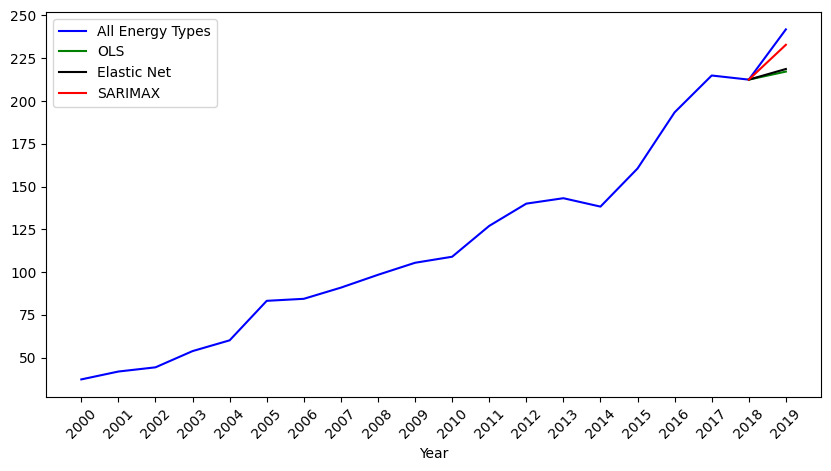

In [40]:
fig, ax = plt.subplots(figsize=(10, 5))

dfplot[dfplot['Energy_type'] == 'all_energy_types'].plot(x='Year', y='CO2_emission', kind='line', ax=ax, color='blue', label='All Energy Types')
ols_plot.plot(x='Year', y='CO2_emission', kind='line', ax=ax, color='green', label='OLS')
enet_plot.plot(x='Year', y='CO2_emission', kind='line', ax=ax, color='black', label='Elastic Net')
sarimax_plot.plot(x='Year', y='CO2_emission', kind='line', ax=ax, color='red', label='SARIMAX')

plt.xticks(np.arange(2000, 2020, 1), rotation=45)
plt.legend()
plt.show()

## 2018 to 2019

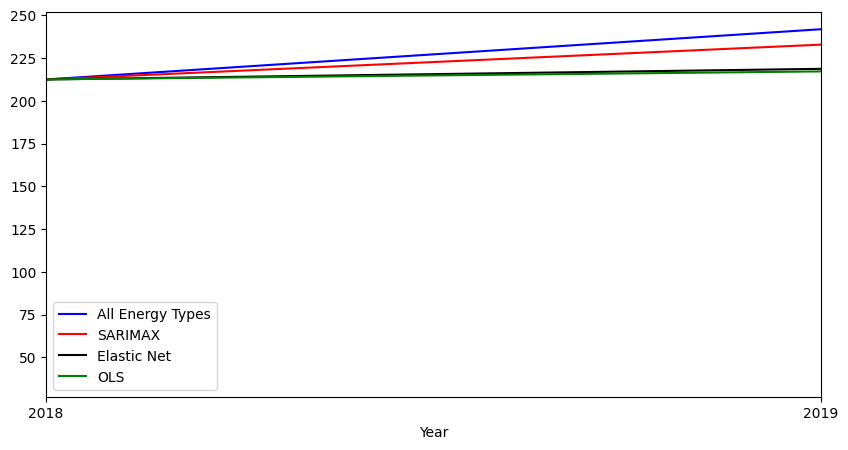

In [41]:
fig, ax = plt.subplots(figsize=(10, 5))

dfplot[dfplot['Energy_type'] == 'all_energy_types'].plot(x='Year', y='CO2_emission', kind='line', ax=ax, color='blue', label='All Energy Types')
sarimax_plot.plot(x='Year', y='CO2_emission', kind='line', ax=ax, color='red', label='SARIMAX')
enet_plot.plot(x='Year', y='CO2_emission', kind='line', ax=ax, color='black', label='Elastic Net')
ols_plot.plot(x='Year', y='CO2_emission', kind='line', ax=ax, color='green', label='OLS')

plt.xlim(2018, 2019)
plt.xticks(np.arange(2018, 2020, 1))
plt.show()

- So sánh kết quả của 3 mô hình

- Dữ liệu thực tế của năm 2019 là **241.81**

| Model | CO2 Emission | Error |
| -- | -- | -- |
| SARIMAX | 232.81 | 9 |
| OLS | 215.15 | 26.66 |
| Elastic Net | 218.66 | 23.15 |

-> SARIMAX cho kết quả tốt nhất

# **6. Đôi điều về đồ án** <a name = "section6"></a>
[Quay về mục lục](#TOC)

Mỗi thành viên gặp khó khăn gì?
- Tập dữ liệu bị bias khá nhiều, cần tốn khá nhiều thời gian để xử lý hợp lý.

Mỗi thành viên học được những gì?
- Biết cách phân bổ thời gian hợp lí.

Nếu có thêm thời gian, sẽ làm những gì?
- Xem lại những câu hỏi cũ, có thể là cụ thể hóa những câu hỏi đó để có thể tìm được đáp án gần chính xác nhất.
- Có thể áp dụng các mô hình học máy khác để tìm ra được mô hình tô nhất, từ đó có thể phục vụ cho các câu hỏi liên quan.

# **6. Nguồn tham khảo** <a name = "section6"></a>
[Quay về mục lục](#TOC)

1. Sách PHÂN TÍCH DỮ LIỆU - Data Analysis - Bùi Tiến Lên
2. https://www.kaggle.com/datasets/lobosi/c02-emission-by-countrys-grouth-and-population
3. https://phamdinhkhanh.github.io/2019/12/12/ARIMAmodel.html
4. https://www.machinelearningplus.com/time-series/augmented-dickey-fuller-test/
5. https://towardsdatascience.com/time-series-forecasting-with-arima-sarima-and-sarimax-ee61099e78f6
6. https://public.tableau.com/app/profile/samodrole